# **Assignment 2**


---


Students: Gergana Ivanova, Katherine Tu, Silvija Radzevičiūtė




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
%matplotlib inline
plt.close('all')

# **Part A**

# **Question 1**

In [3]:
df_red = pd.read_csv('winequality-red.csv', sep= ";")
df_white = pd.read_csv('winequality-white.csv', sep = ";")

In [4]:
# red wine
df = df_red.drop('quality', axis=1)
X = df.to_numpy()
y = df_red['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

parameters = {'C': [0.1, 1, 10, 20, 30, 40]}
grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=10000, multi_class="ovr"), parameters, cv=5)
grid.fit(X_train, y_train)

print(grid.best_estimator_)

best_model = grid.best_estimator_
logreg = best_model.fit(X_train, y_train)
      
print("Training test score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(logreg.coef_!=0)))

LogisticRegression(C=30, max_iter=10000, multi_class='ovr')
Training test score: 0.59
Test set score: 0.64
Number of features used: 66


In [5]:
# white wine
df = df_white.drop('quality', axis=1)
X = df.to_numpy()
y = df_white['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

parameters = {'C': [1, 10, 20, 30, 40, 50]}
grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=10000, multi_class="ovr"), parameters, cv=5)
grid.fit(X_train, y_train)

print(grid.best_estimator_)

best_model = grid.best_estimator_
logreg = best_model.fit(X_train, y_train)

      
print("Training test score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(logreg.coef_!=0)))

LogisticRegression(C=40, max_iter=10000, multi_class='ovr')
Training test score: 0.54
Test set score: 0.52
Number of features used: 77


##### Drawbacks and Adventage of using multiclass logistic regression

Pros:

*   Easy to implement and interpret yet efficient in training (it doesn't need lots of operation time).
*   Perform well on low dimensional dataset.
*   Predicted parameters give inference about the importance of each feature


Cons:
*   Boundaries of each feature are different which may cause as issue with the accuracy of the findings.

# **Question 2**

Loading datasets

In [6]:
df_test = pd.read_csv('test.csv')
df_testlabel = pd.read_csv('test_label.csv')
df_train = pd.read_csv('train.csv')

Checking whether missing values exist or not.

By using `.info()` , we found no missing values exist in the dataset.




In [7]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4291 non-null   int64 
 1   age        4291 non-null   int64 
 2   job        4291 non-null   object
 3   marital    4291 non-null   object
 4   education  4291 non-null   object
 5   default    4291 non-null   object
 6   balance    4291 non-null   int64 
 7   housing    4291 non-null   object
 8   loan       4291 non-null   object
 9   contact    4291 non-null   object
 10  day        4291 non-null   int64 
 11  month      4291 non-null   object
 12  campaign   4291 non-null   int64 
 13  pdays      4291 non-null   int64 
 14  previous   4291 non-null   int64 
 15  poutcome   4291 non-null   object
dtypes: int64(7), object(9)
memory usage: 536.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count

Converting datasets to one-hot encoding with `pd.get_dummies()`

In [8]:
# test set to dummies
print("Original features:\n", list(df_test.columns), "\n")
test_dummies = pd.get_dummies(df_test)
print("Features after get_dummies:\n", list(test_dummies.columns))

Original features:
 ['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome'] 

Features after get_dummies:
 ['ID', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [9]:
# training set to dummies
print("Original features:\n", list(df_train.columns), "\n")
train_dummies = pd.get_dummies(df_train)
print("Features after get_dummies:\n", list(train_dummies.columns))

Original features:
 ['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'y'] 

Features after get_dummies:
 ['ID', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknow

#### **Classification I - LinearSVC**

In [10]:
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
# Extract NumPy arrays
X_train = train_dummies.iloc[:,:-2].values
y_train = df_train['y']
X_test = test_dummies.values
y_test = df_testlabel['y']

In [12]:
# 'Unscaled' result
process2 = [('svc', LinearSVC(max_iter=1000))]
pipeline2 = Pipeline(process2)
params_grid = {'svc__C': [0.01, 0.1, 1, 10]}
linear_svc = GridSearchCV(pipeline2, params_grid, cv=5, return_train_score=True)

linear_svc.fit(X_train, y_train)

print(linear_svc.best_params_)
print('Unscaled Training set score: {:.2f}'.format(linear_svc.best_score_))
print("Unscaled Test set score: {:.2f}".format(linear_svc.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

{'svc__C': 1}
Unscaled Training set score: 0.57
Unscaled Test set score: 0.69


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
# 'Scaled' result
process = [('scaler', StandardScaler()), ('svc', LinearSVC(max_iter=1000))]
pipeline = Pipeline(process)
params_grid = {'svc__C': [0.01, 0.1, 1, 10]}
linear_svc = GridSearchCV(pipeline, params_grid, cv=5, return_train_score=True)

linear_svc.fit(X_train, y_train)

print(linear_svc.best_params_)
print('Scaled Training set score: {:.2f}'.format(linear_svc.best_score_))
print("Scaled Test set score: {:.2f}".format(linear_svc.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

{'svc__C': 0.1}
Scaled Training set score: 0.77
Scaled Test set score: 0.78


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### Linear SVC Evaluation Metrics

In [14]:
y_pred_linearsvc = linear_svc.predict(X_test)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred_linearsvc)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_linearsvc)))
print(classification_report(y_test, y_pred_linearsvc))

Confusion matrix:
[[2789  180]
 [ 759  563]]
Accuracy: 0.7811698904684223
              precision    recall  f1-score   support

          no       0.79      0.94      0.86      2969
         yes       0.76      0.43      0.55      1322

    accuracy                           0.78      4291
   macro avg       0.77      0.68      0.70      4291
weighted avg       0.78      0.78      0.76      4291



##### **Linear Support Vector Classification result analysis**

By using scaled dataset, the training score(0.77) performs a lot better than unscaled result(0.69). While trying some hyperparamters during GridSearchCV, we found that the optimal value for C is 1. Also, we can conclude that this is a good model since scaled test and training set score are similar with high accuracy(0.78).

#### **Classification II - LogisticRegression**

In [15]:
# 'UnsScaled' result
process4 = [('logistic', LogisticRegression(max_iter=100000))]
pipeline = Pipeline(process4)
params_grid = {'logistic__C': [0.01, 0.1, 1, 10, 100]} 
log_reg = GridSearchCV(pipeline, params_grid, cv=5, return_train_score=True)

log_reg.fit(X_train, y_train)

print(log_reg.best_params_)
print('UnScaled Training set score: {:.2f}'.format(log_reg.best_score_))
print("Unscaled Test set score: {:.2f}".format(log_reg.score(X_test, y_test)))

{'logistic__C': 1}
UnScaled Training set score: 0.74
Unscaled Test set score: 0.71


In [16]:
# 'Scaled' result
process3 = [('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=100000))]
pipeline = Pipeline(process3)
params_grid = {'logistic__C': [0.01, 0.1, 1, 10, 100]} 
log_reg = GridSearchCV(pipeline, params_grid, cv=5, return_train_score=True)

log_reg.fit(X_train, y_train)

print(log_reg.best_params_)
print('Scaled Training set score: {:.2f}'.format(log_reg.best_score_))
print("Scaled Test set score: {:.2f}".format(log_reg.score(X_test, y_test)))

{'logistic__C': 10}
Scaled Training set score: 0.77
Scaled Test set score: 0.78


##### Logistics Regression Evaluation Metrics

In [17]:
y_pred_logreg = log_reg.predict(X_test)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred_logreg)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_logreg)))
print(classification_report(y_test, y_pred_logreg))

Confusion matrix:
[[2740  229]
 [ 722  600]]
Accuracy: 0.7783733395478909
              precision    recall  f1-score   support

          no       0.79      0.92      0.85      2969
         yes       0.72      0.45      0.56      1322

    accuracy                           0.78      4291
   macro avg       0.76      0.69      0.71      4291
weighted avg       0.77      0.78      0.76      4291



##### **Logistic Regression Classification result analysis**

With the scaled dataset, the training score(0.77) performs better than unscaled result(0.74). By trying some hyperparamters during GridSearchCV, we found that the optimal value for C is 10. Also, we can conclude that this model isn't overfitting nor underfitting since scaled test and training set score are similar with high accuracy(0.78).


#### **Classification III - KNeighborsClassifier**

In [18]:
# 'Unscaled' result
knn_process2 = [('knn', KNeighborsClassifier())]
knn_pipe = Pipeline(knn_process2)

params_grid = {'knn__n_neighbors': range(1, 21)}
knn_grid = GridSearchCV(knn_pipe, params_grid, cv=5, return_train_score=True)

knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)
print('Unscaled Training set score: {:.2f}'.format(knn_grid.best_score_))
print("Unscaled Test set score: {:.2f}".format(knn_grid.score(X_test, y_test)))

{'knn__n_neighbors': 14}
Unscaled Training set score: 0.68
Unscaled Test set score: 0.69


In [19]:
# 'scaled' result
knn_process = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
knn_pipe = Pipeline(knn_process)

params_grid = {'knn__n_neighbors': range(1, 31)}
knn_grid = GridSearchCV(knn_pipe, params_grid, cv=5, return_train_score=True)

knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)
print('Scaled Training set score: {:.2f}'.format(knn_grid.best_score_))
print("Scaled Test set score: {:.2f}".format(knn_grid.score(X_test, y_test)))

{'knn__n_neighbors': 15}
Scaled Training set score: 0.77
Scaled Test set score: 0.77


In [20]:
y_pred_knn = knn_grid.predict(X_test)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, y_pred_knn)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_knn)))
print('Report: \n{}'.format(classification_report(y_test, y_pred_knn)))

Confusion matrix:
[[2764  205]
 [ 771  551]]
Accuracy: 0.772547191796784
Report: 
              precision    recall  f1-score   support

          no       0.78      0.93      0.85      2969
         yes       0.73      0.42      0.53      1322

    accuracy                           0.77      4291
   macro avg       0.76      0.67      0.69      4291
weighted avg       0.77      0.77      0.75      4291



##### **K-Neighbors Classifier analysis**

With the scaled dataset, the training score(0.77) performs better than unscaled result(0.68). By trying n_neighbors from 1 to 31 during GridSearchCV, we found that the optimal KNN n_neighbors is 15. Also, we can conclude that this model isn't overfitting nor underfitting since scaled test and training set score are extremely similar with high accuracy(0.77).

## **Part B**

## **Decision Tree Classifier**

In [21]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set : {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.602


In [22]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.13459902 0.11670662 0.13978085 0.0930618  0.04727234 0.03733872
 0.01704717 0.00751603 0.00784722 0.00409917 0.00125477 0.01253959
 0.00333712 0.00650244 0.00594554 0.00481634 0.01400586 0.00582497
 0.00090161 0.00398912 0.00942914 0.00941791 0.00521332 0.0092942
 0.01112592 0.00511612 0.0018054  0.00198235 0.00649068 0.01063933
 0.00504485 0.00635063 0.00389562 0.0048701  0.03271907 0.00734868
 0.00617025 0.00509775 0.00921796 0.00470783 0.00427834 0.01708326
 0.01335339 0.00500178 0.01038952 0.01401109 0.00996711 0.00422964
 0.00134058 0.09704473 0.00297716]


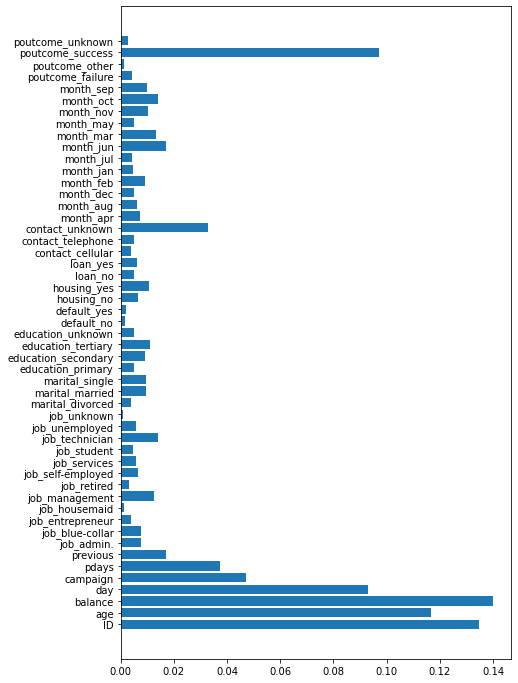

In [23]:
plt.rcParams["figure.figsize"] = (7,12)
plt.barh(range(51), tree.feature_importances_)
plt.yticks(range(51), train_dummies.iloc[:,:-2].keys())
plt.show()

Most important features: balance, age, ID, campaign, poutcome_success, pdays, contact_unknown. Other ones are similarly less important.

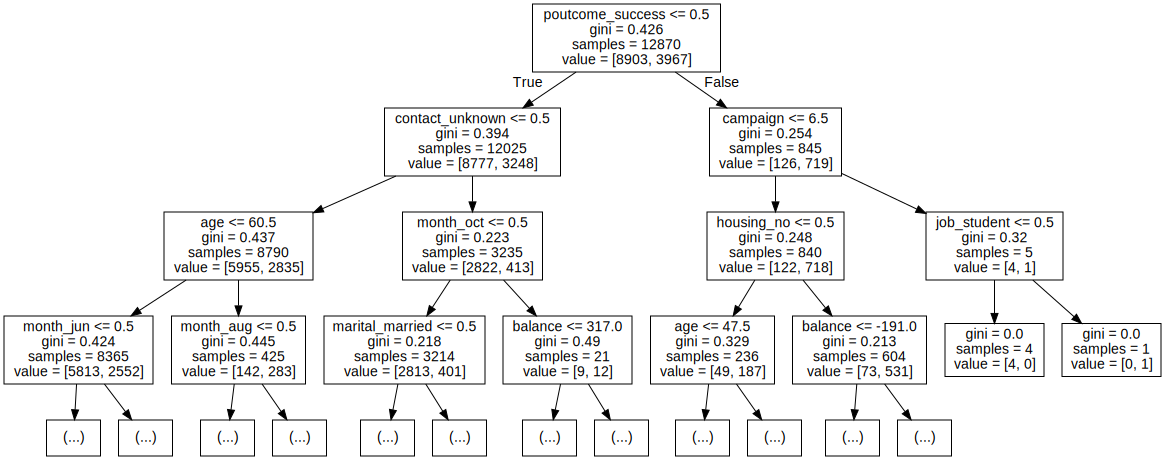

In [24]:
from sklearn.tree import export_graphviz
tree_dot = export_graphviz(tree, out_file=None, feature_names=train_dummies.iloc[:,:-2].keys(), max_depth=3)
import graphviz
graphviz.Source(tree_dot)

The tree with max depth equal to 3. We can already see some pure nodes.

In [25]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 100, 5),
    'max_features': range(1,52)
}
# Create a based model
rf = DecisionTreeClassifier(random_state = 0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=3, return_train_score=True)

In [26]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_

print("Optimal parameters: {}\n".format(grid_search.best_params_))

Optimal parameters: {'max_depth': 10, 'max_features': 15}



In [27]:
tree2 = best_grid.fit(X_train, y_train)
print("Training set score: {:.2f}".format(tree2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree2.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.75


In [28]:
#Precision, recall, f1-score and accuracy before pruning
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

          no       0.76      0.63      0.69      2969
         yes       0.39      0.55      0.46      1322

    accuracy                           0.60      4291
   macro avg       0.58      0.59      0.57      4291
weighted avg       0.64      0.60      0.62      4291

0.601957585644372


In [29]:
#Precision, recall, f1-score and accuracy after pruning
y_pred_tree = tree2.predict(X_test)

print(classification_report(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

          no       0.81      0.83      0.82      2969
         yes       0.59      0.56      0.58      1322

    accuracy                           0.75      4291
   macro avg       0.70      0.69      0.70      4291
weighted avg       0.74      0.75      0.74      4291

0.7455138662316476


As we can see, pruning really helps with the precision, recall and accuracy and improves the model. The model with optimal hyperparameters gives good performance. The precision, recall and f1 scores are good and very similar to each other. It means that the number of FP and FN are similar and not very large. The model is 75% accurate.

**Answer the question : Are these models resilient to overfitting when model hyperparameters
have not been carefully selected? Supplement your explanation with suitable figures/tables if
necessary. Please limit your explanation to a maximum of 50 words.**

If the hyperparameters are not selected, the tree tends to overfit. As we can see, before pruning the training set score is 1, it means that all the leafs are pure and the tree will not be able to achieve generalization. If we find the best hyperparameters, overfitting decreases. Then the training set score decreases, however the test set score increases (we can see it in the graph below).

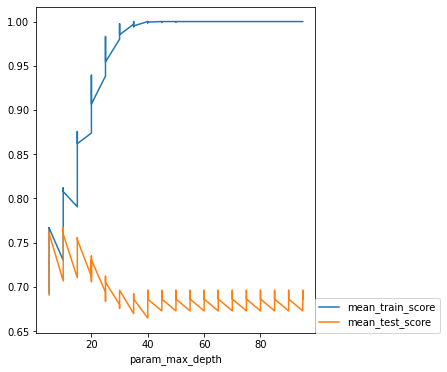

In [30]:
scores = pd.DataFrame(grid_search.cv_results_)
plt.rcParams["figure.figsize"] = (5,6)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))
plt.show()

**In less than 50 words, explain your observations and your assessment of the classifier.**

*Cons:* to be able to get good results with the Decision Tree Classifier, it is crucial to prune the data (for example, find the optimal hyperparameters) to avoid overfitting. Also, it can be difficult to understand the tree if there are big amounts of data. 

*Pros:* It requires little data preparation to get the results. It is also beneficial, because both numerical and categorical data can be used.

# **Random Forest Classifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


In [32]:
print("Feature importances:\n{}".format(forest.feature_importances_))

Feature importances:
[0.11629298 0.11513779 0.11911259 0.0982096  0.05270045 0.0425381
 0.0239254  0.01014053 0.01138776 0.00523428 0.00366081 0.01221772
 0.0064133  0.00588977 0.00845367 0.00519506 0.01271804 0.00556388
 0.00111919 0.00838748 0.01226343 0.01121581 0.0089689  0.01367363
 0.01302082 0.00523185 0.00191508 0.00197633 0.01373958 0.01705464
 0.00827975 0.00859559 0.01441518 0.00469955 0.01755228 0.01334386
 0.01159653 0.00389466 0.00861856 0.00506647 0.01006911 0.01233625
 0.01040852 0.01279595 0.00966943 0.01214006 0.00706666 0.00771278
 0.00420556 0.04211083 0.01206395]


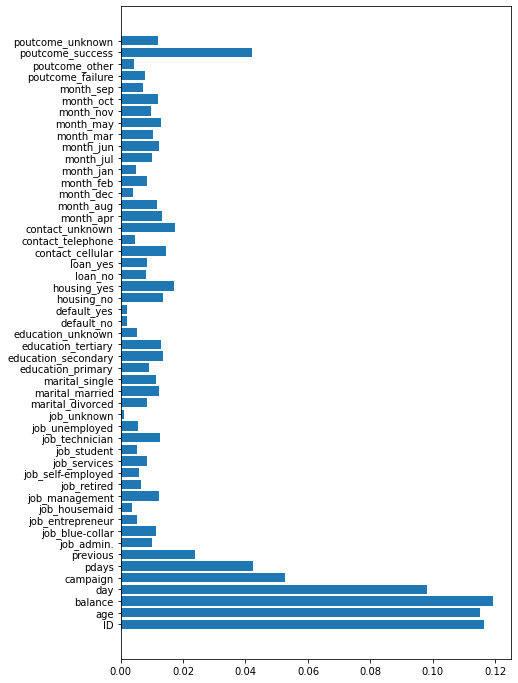

In [33]:
plt.rcParams["figure.figsize"] = (7,12)
plt.barh(range(51), forest.feature_importances_)
plt.yticks(range(51), train_dummies.iloc[:,:-2].keys())
plt.show()

Most important features are the day, the balance, the age and the ID.

In [34]:
#Precision, recall, f1-score and accuracy before pruning
y_pred_forest = forest.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred_forest))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy score:  0.7869960382195292
Confusion matrix: 
 [[2716  253]
 [ 661  661]]
              precision    recall  f1-score   support

          no       0.80      0.91      0.86      2969
         yes       0.72      0.50      0.59      1322

    accuracy                           0.79      4291
   macro avg       0.76      0.71      0.72      4291
weighted avg       0.78      0.79      0.77      4291



**b)**

We observe an accuracy of ~78.7%. On the diagonal of the confusion matrix, we can see how many times the predicted label maches the true label. Values in the other cells show where the classifier mislabeled an observation.

Micro average is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise. Thus, in our case since we are doing a binary classification, the micro average = the accuracy = 0.787.

We see that out of all the positive predictions, 76% of them are truly positive based on the macro average (precision). And out of all the actual positive examples, 71% of them were correctly predicted to be positive (recall).

The F1 score serves as a helpful metric that considers both the precision and the recall in order to evaluate the model comprehensively. We observe that the dataset is imbalanced since there are more than 2 times more no instances than yes instances. In such cases, taking the micro average (the accuracy in our case) is the better option. Micro-average: calculating metrics globally by counting the total true positives, false negatives and false positives. Micro avg prevails as a choice when we are interested in simply maximizing the number of correct predictions the classifier makes.



**c)**



**i. How are decision tree classifiers different from random forests on a structural level?**

Decision tree classifiers create a tree-like model of decisions along with possible outcomes in a diagram. Meanwhile, random forests classifier is an algorithm consisting of many decision trees combined to get a more accurate result compared to a single tree.

**ii. Where would you choose decision trees over random forests and vice-versa? Demonstrate this using an appropriate example from your data.**

Choosing random forests over decision trees can be because random forest algorithm avoids and prevents overfitting and gives accurate and precise results - as we see accuracy 0.787 vs 0.602 before pruning. Choosing decision trees over random forests might be because they require low computation, thus reducing time to implement and they are easy to visualise.

**iii. Is accuracy an appropriate evaluation metric for this classification task? if yes, in what kind of data may it not be a good metric?**

Yes, as we are interested in maximizing the number of correct predictions, the accuracy is a good evaluation metric. However, for a classification problem, diagnosing a disease in 1% of the population.  It could achieve a 99% micro-averaged accuracy on the task. Thus we use the macro avgerage as it gives each class equal importance.

**d)**

After evaluating a couple of ranges for the hyperparameter tuning, in order for the code to run in a timely manner we have restricted the ranges.

In [36]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(10,25,5),
    'max_features': range(10,20),
    'n_estimators': [700,900,1000]
}
# Create a based model
rf = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1, return_train_score=True)


In [37]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_

print("Optimal parameters: {}\n".format(grid_search.best_params_))


Fitting 3 folds for each of 90 candidates, totalling 270 fits
Optimal parameters: {'max_depth': 20, 'max_features': 12, 'n_estimators': 900}



The best hyperparameters are:
max_depth = 20, max_features = 12, n_estimators = 1000

In [38]:
forest1 = best_grid.fit(X_train, y_train)
print("Training set score: {:.2f}".format(forest1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest1.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.79


The training score is 0.95 and the test score is 0.7923560941505476 - sligthly better from the result before pruning.

In [39]:
#Precision, recall, f1-score and accuracy after pruning
y_pred_forest1 = forest1.predict(X_test)

print(classification_report(y_test, y_pred_forest1))
print("Accuracy score: ", accuracy_score(y_test, y_pred_forest1))

              precision    recall  f1-score   support

          no       0.80      0.93      0.86      2969
         yes       0.75      0.49      0.59      1322

    accuracy                           0.79      4291
   macro avg       0.78      0.71      0.73      4291
weighted avg       0.79      0.79      0.78      4291

Accuracy score:  0.7923560941505476


**In less than 50 words, explain your observations and your assessment of the classifier.**

*Cons:* The main drawback for the Random Forest Classifier is the complexity, it is much more time-intensive than decision tree construction and requires more computational power to implement. 

*Pros:* Random forest avoid overfitting and when using it, it is not crucial to prune data as the scores were identical in our case.